**Exercise set 6**
==============


>In connection with experimental design, we have seen two approaches
>for checking if determined effects are important or not. These two
>approaches are based on creating a probability plot and performing ANOVA.
>The goal of this exercise is to learn how we use these two approaches in
>practice.


**Exercise 6.1**

In this part of the exercise, we will deal with the technical aspects of
creating a normal probability plot. Our final aim is here
to check if the data for some measured quantities (given in
the data files:
[data1.txt](Data/data1.txt) (located at `Data/data1.txt`),
[data2.txt](Data/data2.txt) (located at `Data/data2.txt`),
[data3.txt](Data/data3.txt) (located at `Data/data3.txt`), and
[data4.txt](Data/data4.txt) (located at `Data/data4.txt`))
comes
from a normal distribution.


**(a)**  Before we begin creating normal probability plots, we should
inspect the raw data. Plot histograms for the raw data. Based
on this, would you say that any of the data files contain numbers
that might come from a normal distribution?
You can also, for each data set, try to compare directly with
a normal distribution. For each data set, you can obtain
the mean and standard deviation, and you can plot
a normal distribution with these values in the same figure
where you have the histograms.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import glob

<IPython.core.display.Javascript object>


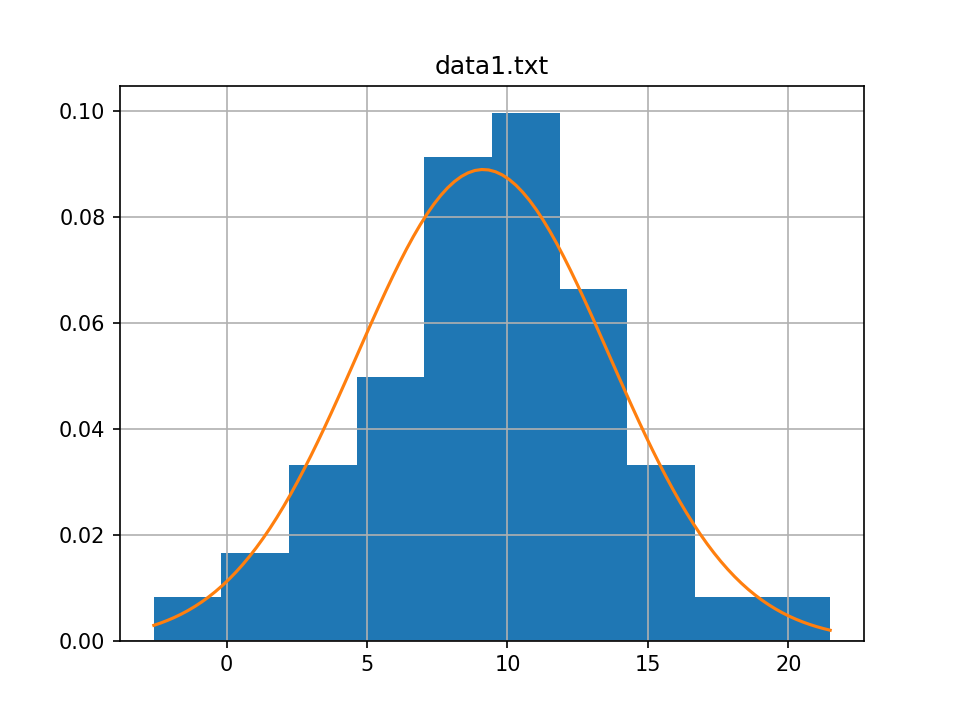

<IPython.core.display.Javascript object>


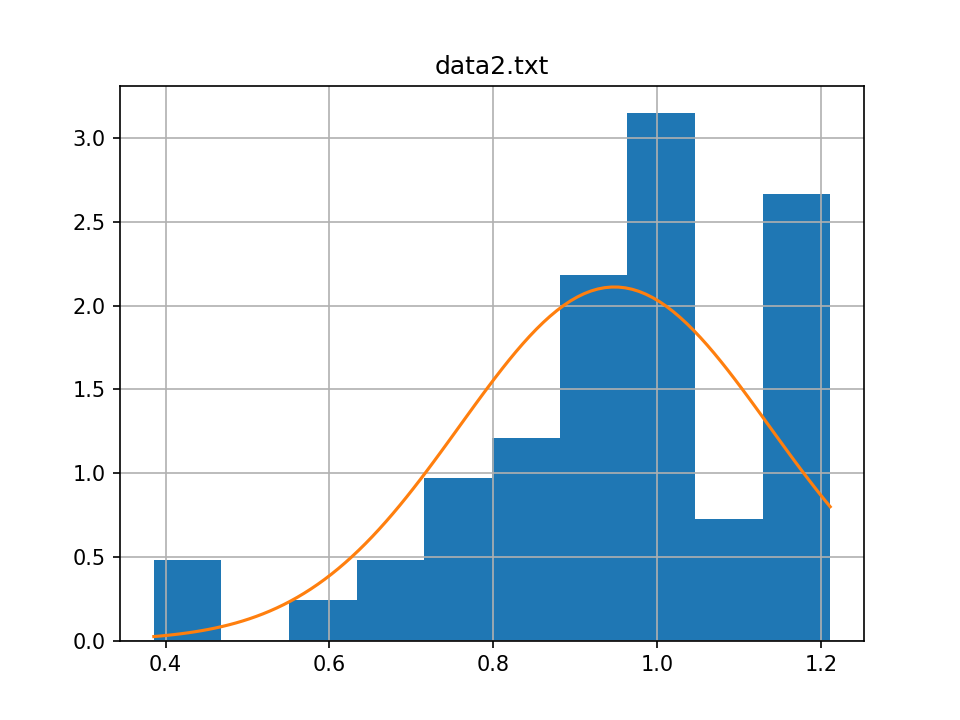

<IPython.core.display.Javascript object>


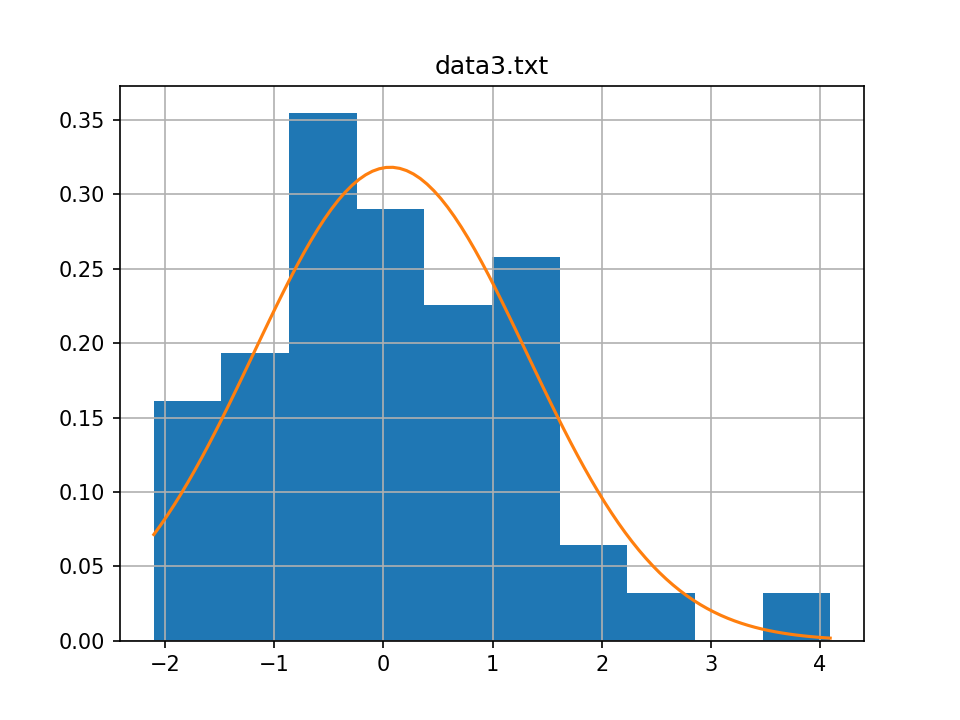

<IPython.core.display.Javascript object>


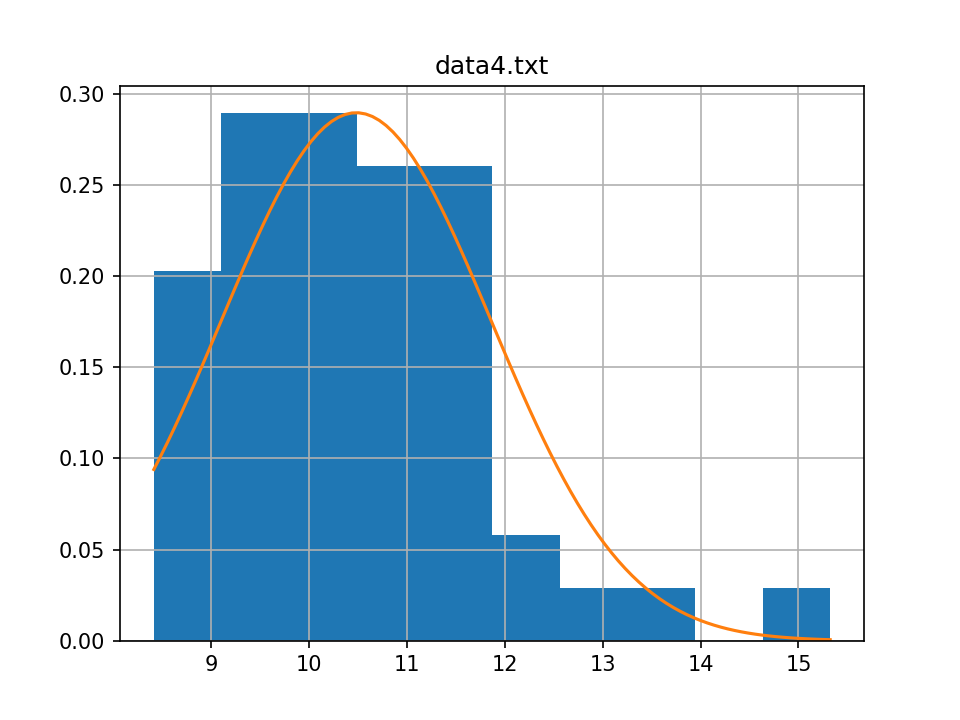

In [2]:
#Get all the file names
fnames = glob.glob("Data/data*.txt")
fnames.sort() # Sort them
#read the files (no headers in these files)
datas = [pd.read_csv(fname, header=None) for fname in fnames] 

for name, data in zip(fnames, datas):
    #plot histogram
    ax = data.hist(density=True) #Normalize the density
    ax = ax.flatten()[0]
    #plot normal distribution
    mean = data.mean()
    std = data.std()

    x = np.linspace(data.min(), data.max(), 100)
    y = sp.stats.norm.pdf(x, mean, std)
    ax.plot(x,y)
    ax.set_title(name.rsplit('/',1)[1])

**Answer to question 6.1(a):** Data1 (and maybe Data3) seem to align reasonably with a normal distibution plot. While the others look like different distributions 

**(b)**  For creating the normal probability plot, we need to be able
to obtain certain parameters for the standard normal distribution.
Here, we will investigate some of the functions that can give us
such parameters.

The standard normal probability density function ($\operatorname{PDF}$) is given by,

$\operatorname{PDF}(x) = \frac{1}{\sqrt{2 \pi}} \operatorname{e}^{-\tfrac{x^2}{2}},$

and the cumulative distribution function (CDF) is,

$
\operatorname{CDF}(x) = \int_{-\infty}^{x} \operatorname{PDF} (t)\,\operatorname{d}t = 
\frac{1}{2} \left[ 1 + \operatorname{erf} \left( \frac{x}{\sqrt{2}} \right) \right],
$

where $\operatorname{erf}(\ldots)$ is the error function.
The cumulative distribution function gives the probability of observing a
value less than or equal to $x$: $P(X \leq x) = \operatorname{CDF}(x)$.

We can also turn this equation around: Given a probability $P$ what is
the value of $x$ that gives this probability? To answer this question,
we need the quantile function (also known as the percent-point function),
which is the inverse of the cumulative distribution function.
For the standard normal distribution, the percent-point
function ($\operatorname{PPF}$),
is given by,

$
\operatorname{PPF}(P) = \sqrt{2} \operatorname{erf}^{-1}(2P - 1).
$

If we make use of the `scipy` package, all these functions
are available to us:
```python
from scipy.stats import norm
import numpy as np

x = np.linspace(-2, 2, 100)
pdf = norm.pdf(x)  # Probability density function.
cdf = norm.cdf(x)  # Cumulative probability density function.
ppf = norm.ppf(x)  # Quantile function/percent-point function.
```


Use these methods to answer the following questions for the standard normal distribution:

* (i)  What is the probability of observing a $x \leq 1$?

* (ii)  What is the probability of observing a $x \leq 0$?

* (iii)  What is the probability of observing a $x \leq -2$?

* (iv)  Given that the probability of observing $x \leq \alpha$ is
$10$\%, what is $\alpha$?

* (v)  Given that the probability of observing $x \leq \alpha$ is
$90$\%, what is $\alpha$?

* (vi)  Given that the probability of observing $x \leq \alpha$ is
$99$\%, what is $\alpha$?






In [3]:
from scipy.stats import norm
import numpy as np

# We use a python trick here where we are going to loop over functions, but don't call them yet
# Note the lack of parentheses after the function
ans = [(norm.cdf, 1),
       (norm.cdf, 0),
       (norm.cdf, -2),
       (norm.ppf, 0.1),
       (norm.ppf, 0.9),
       (norm.ppf, 0.99)]

print("Answers")
starts = ['(i):   P =',
        '(ii):  P =',
        '(iii): P =',
        '(iv):  α =',
        '(v):   α =',
        '(vi):  α =']


for start, (func, val) in zip(starts, ans):
    # Here we call the function (func) with the value (val)
    print(start+f" {func(val)}")

Answers
(i):   P = 0.8413447460685429
(ii):  P = 0.5
(iii): P = 0.022750131948179195
(iv):  α = -1.2815515655446004
(v):   α = 1.2815515655446004
(vi):  α = 2.3263478740408408


**Answer to question 6.1(b):** see above

**(c)**  To construct the normal probability plot, we will make use of
the $\operatorname{PPF}$.
If the data we are to investigate contain $n$ points, then
we need to figure out how these $n$ points would be placed
in the distribution we are going to compare with (here: the standard normal distribution).
In the following, we will call the $n$ points we have measured
for $y_1$, $y_2$, $\ldots$, $y_n$, and we assume that we have
sorted them so that $y_1 \leq y_2 \leq \ldots \leq y_n$.

We now need to check
how $n$ points drawn from a normal distribution would
be distributed, and compare this with how our measured data is distributed.
One way of doing that is to find the most probable location ($x_1$) of the
smallest value, the most probable location ($x_2$) of the second smallest
value, and so on, up to the most probable location ($x_n$) for the
largest value. There is no simple formula for finding $x_i$ and we have
to rely on a result from statistics:  These locations, the so-called
order statistic medians, for the normal distribution are exactly
related to order statistic medians from a *uniform distribution*, $m_i$, by,

\begin{equation}
x_i = \operatorname{PPF}(m_i) .
\label{eq:orderstat}
\tag{1}
\end{equation}

Thus we can potentially find $x_i$ by first obtaining the corresponding
$m_i$. Unfortunately, no analytical expression for $m_i$ exist and
we have to rely on approximate estimates. One such approximation
was
suggested by [Filliben](https://doi.org/10.1080/00401706.1975.10489279),

\begin{equation}
m_i = 
\begin{cases}
1 - 0.5^{1/n} & \text{if } i = 1, \\
\frac{i - 0.3175}{n + 0.365} & \text{if } i = 2, 3, \ldots, n-1, \\
0.5^{1/n} & \text{if } i=n,
\end{cases}
\label{eq:uniformorderstat}
\tag{2}
\end{equation}

Thus, in summary, to create the normal probability plot we do the following:

* (i)  We sort our original data ($y_1$, $y_2$, $\ldots$, $y_n$).

* (ii)  For each sorted data point, we calculate its
uniform order statistic median, $m_i$,
using Eq. \eqref{eq:uniformorderstat}.

* (iii)  For each sorted data point, we calculate its most
probable location, $x_i$, in a normal distribution using
Eq. \eqref{eq:orderstat} and
the $m_i$ value we found in the previous step. 

* (iv)  We plot the sorted data against the most probable locations
found in the previous step. That is, we plot the pairs ($x_i$, $y_i$),
and if the data is from a normal distribution, we expect that these
points fall on a straight line.



Create the normal probability plots for the four data sets given
in [data1.txt](Data/data1.txt) (located at `Data/data1.txt`),
[data2.txt](Data/data2.txt) (located at `Data/data2.txt`),
[data3.txt](Data/data3.txt) (located at `Data/data3.txt`), and
[data4.txt](Data/data4.txt) (located at `Data/data4.txt`). Which
of these would you say are numbers that could originate from a
normal distribution?

<IPython.core.display.Javascript object>


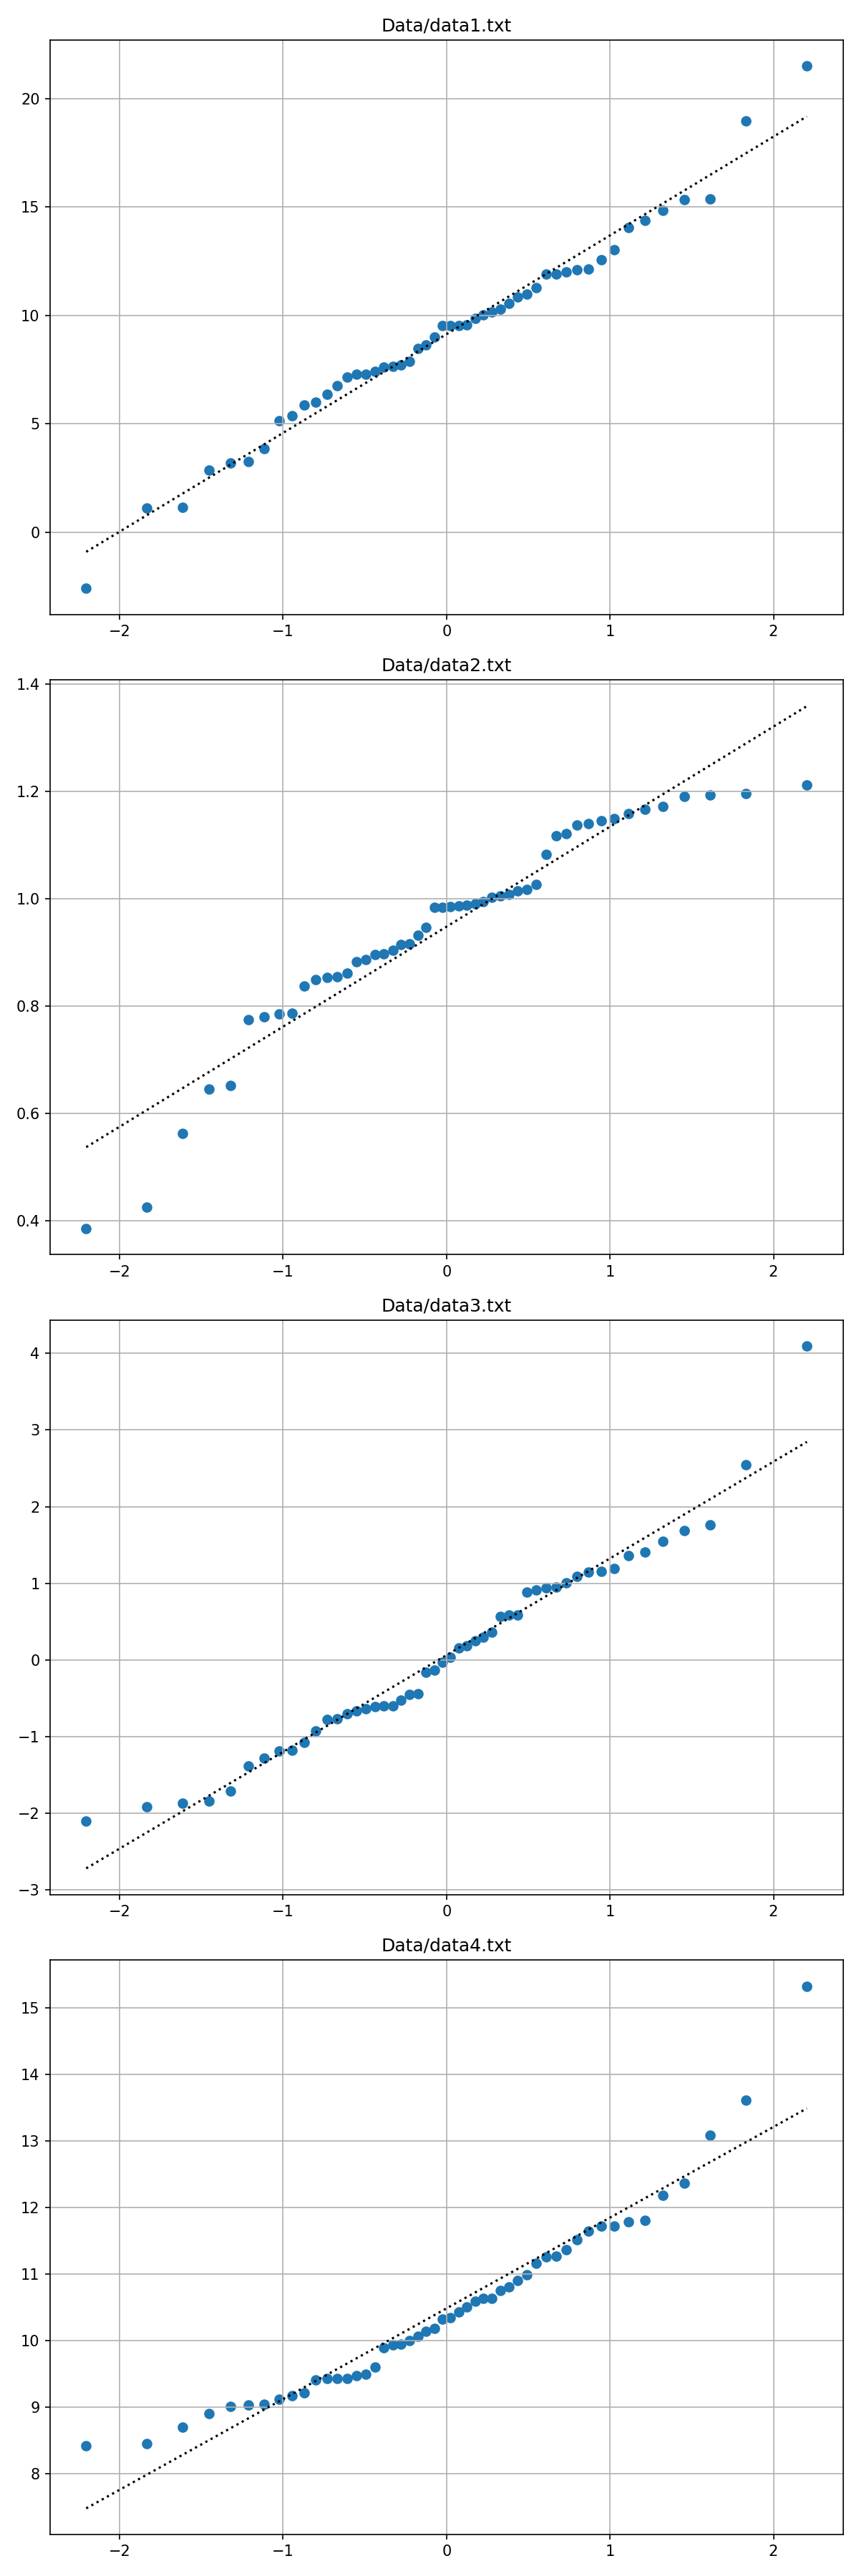

In [4]:
fig, axs = plt.subplots(4,1, figsize=(8, 4*6))
axs = axs.flatten()
for ax, name, data in zip(axs, fnames, datas):
    #Sort the dataframe based on values of column 0
    data = data.sort_values(0)
    n = len(data)
    # first m
    m1 = [1-.5**(1/n)]
    # mi in between
    ms =  [(i-0.3175)/(n+0.365) for i in range(2, n)] #n is not included here
    # last mi
    ml = [0.5**(1/n)]
    mi = m1+ms+ml
    xi = norm.ppf(mi)
    ax.scatter(xi, data)
    ax.set_title(name)
    
    # add a trendline
    param = np.polyfit(xi, data, 1)
    xpoints = np.array([xi[0], xi[-1]])
    y_hat = np.polyval(param, xpoints)
    ax.plot(xpoints, y_hat, ls=':', c='k')
    ax.grid()
    
fig.tight_layout()

**Answer to question 6.1(c):** Again, only Data1 seems to be from a normal distribution, while Data3 seems to follow the the normal distibrution as a borderline case except some outliers.

However, interpreting the figure above in light of the corresponding histogram, we still conclude
that Data3 is probably not from a normal distribution. In fact, this data set is obtained from the Student’s t-distribution which is expected to approximate a normal distribution for large degrees of freedom.

**(d)**  The method we have described above works for any distribution,
not just the normal distribution. We can create similar plots
for other distributions by changing the $\operatorname{PPF}$ function
in Eq. [(1)](#mjx-eqn-eq:orderstat)
to the corresponding function for the distribution we wish to check for.
Repeat the previous step, but use the `Gumbel distribution`
(in `scipy` this is available by
`from scipy.stats import gumbel_r`) in place of the
normal distribution. Based on the plots you now create, would you say
that any of the data sets may contain numbers from a Gumbel distribution?

<IPython.core.display.Javascript object>


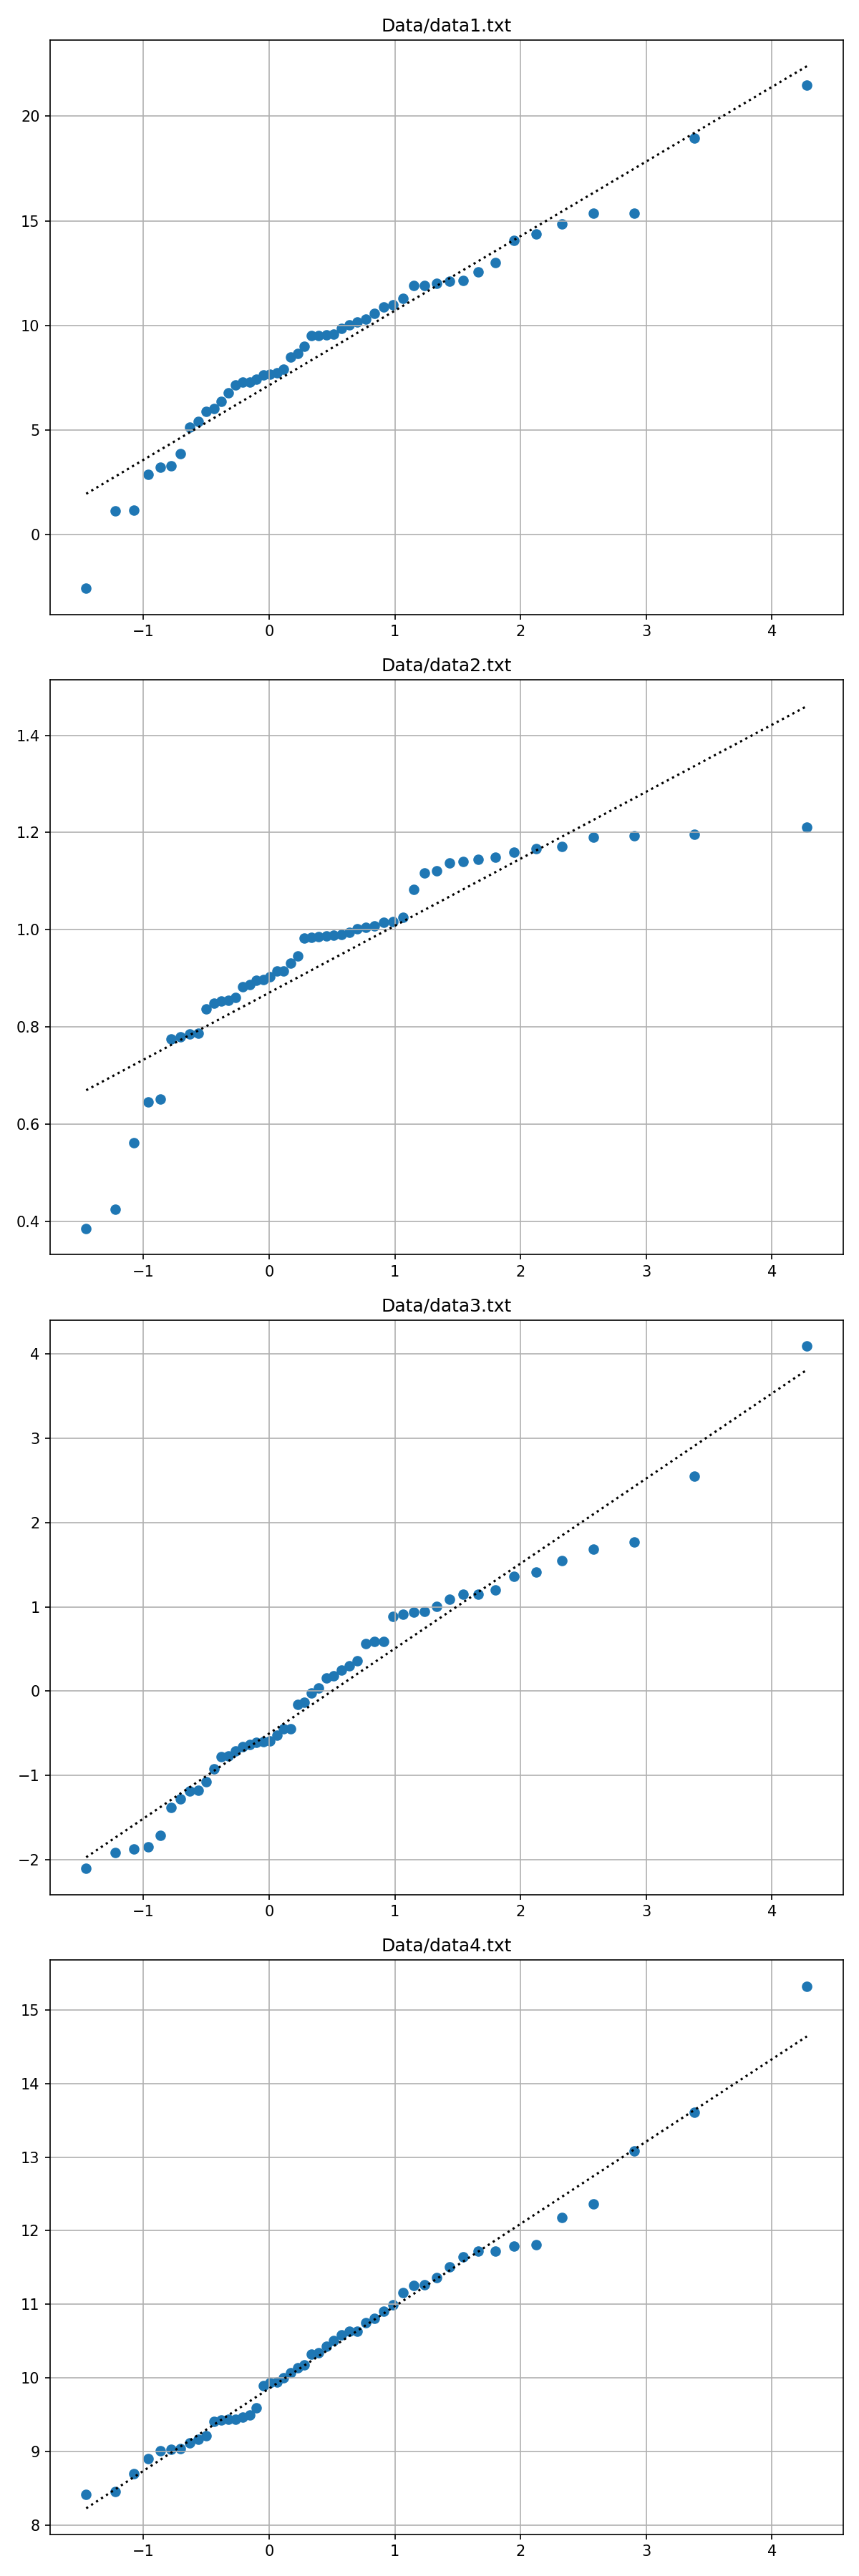

In [5]:
from scipy.stats import gumbel_r
fig, axs = plt.subplots(4,1, figsize=(8, 4*6))
axs = axs.flatten()
for ax, name, data in zip(axs, fnames, datas):
    #Sort the dataframe based on values of column 0
    data = data.sort_values(0)
    n = len(data)
    # first m
    m1 = [1-.5**(1/n)]
    # mi in between
    ms =  [(i-0.3175)/(n+0.365) for i in range(2, n)] #n is not included here
    # last mi
    ml = [0.5**(1/n)]
    mi = m1+ms+ml
    xi = gumbel_r.ppf(mi) #use the ppf of gumbel instead of a normal distribution
    ax.scatter(xi, data)
    ax.set_title(name)
    
    # add a trendline
    param = np.polyfit(xi, data, 1)
    xpoints = np.array([xi[0], xi[-1]])
    y_hat = np.polyval(param, xpoints)
    ax.plot(xpoints, y_hat, ls=':', c='k')
    ax.grid()
    
fig.tight_layout()

**Answer to question 6.1(d):** Here we see that Data4 follows a straight line, while the others do not. We conclude that Data4 is from a Gumbel distribution, while the others are not.

**Exercise 6.2**

After running a set of experiments, you determine the effects
given in Table 1 for $4$ factors: A, B, C, and D.
Use a normal probability plot to identify the important effects among
the ones listed in this table. (Note: These numbers were also used in lecture $6$.)

|**Factor** | **Effect** |
|:---------:|:----------:|
|A          |  -8.00     |
|B          |  24.00     |
|C          |  -2.25     |
|D          |  -5.50     |
|AB         |   1.00     |
|AC         |   0.75     |
|AD         |   0.00     |
|BC         |  -1.25     |
|BD         |   4.50     |
|CD         |  -0.25     |
|ABC        |  -0.75     |
|ABD        |   0.50     |
|ACD        |  -0.25     |
|BCD        |  -0.75     |
|ABCD       |  -0.25     |

| |
|---|
|**Table 1:** *Effects determined in a set of experiments.*|

<IPython.core.display.Javascript object>


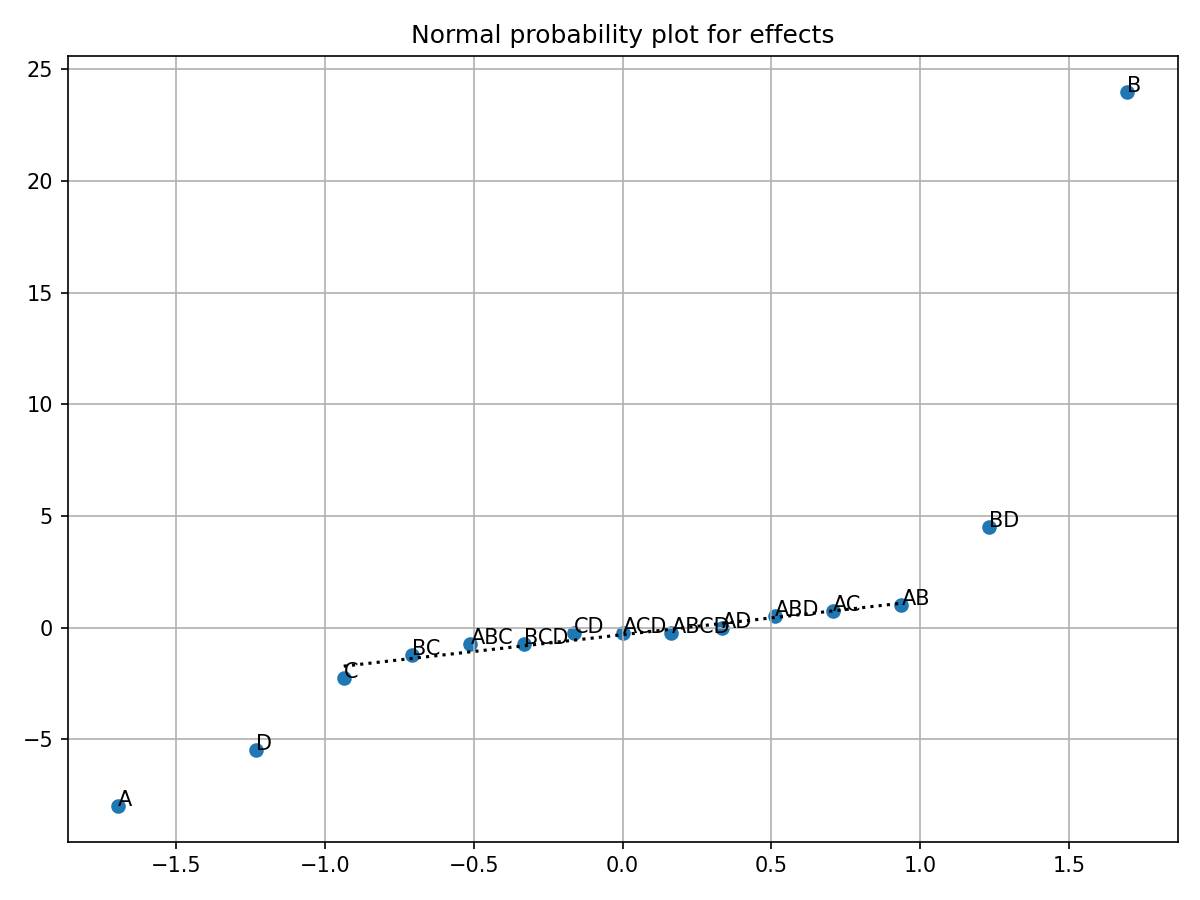

In [6]:
data = [-8, 24, -2.25, -5.5, 1, 0.75, 0.0, -1.25, 4.5, -0.25, -0.75, 0.5, -0.25, -0.75, -0.25]
indices = ['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD', 'ABC', 'ABD', 'ACD', 'BCD', 'ABCD']

df = pd.DataFrame(data=data, index=indices)
df = df.sort_values(0)

fig, axs = plt.subplots(1,1, figsize=(8, 6))
ax = axs

#Sort the dataframe based on values of column 0
data = df
n = len(data)
# first m
m1 = [1-.5**(1/n)]
# mi in between
ms =  [(i-0.3175)/(n+0.365) for i in range(2, n)] #n is not included here
# last mi
ml = [0.5**(1/n)]
mi = m1+ms+ml
xi = norm.ppf(mi)
ax.scatter(xi, data)
ax.set_title("Normal probability plot for effects")

# add a trendline
param = np.polyfit(xi[2:-2], data[2:-2], 1)
xpoints = np.array([xi[2], xi[-3]])
y_hat = np.polyval(param, xpoints)
ax.plot(xpoints, y_hat, ls=':', c='k')
ax.grid()

#Annotate the points
for i, txt in enumerate(data.index):
    ax.annotate(txt, (xi[i], data.iloc[i]))

fig.tight_layout()

**Answer to question 6.2:** The normal probability plot of the effects is given in the figure above. We see here that 4 factors deviate significantly from the other effects, and a straight line through these points: A, D, BD, and B. We thus conclude that these 4 factors are the important factors in this case.

**Exercise 6.3**

From a $2^2$ factorial experiment replicated three times you have obtained
the data given in Table 3. We use here a short-hand notation
for the $4$ possible combinations of the variables: $(1)$, $a$, $b$, and $ab$.
In this notation $(1)$ is the experiment where all factors were at their low levels. For the
other cases, the absence of a letter means that the corresponding factor was at a low level, and
the presence of a letter means that the corresponding factor was at a high level (e.g. "$a$" is the
same as saying that factor A was at the high level and B at the low level). 


|**Experiment** | **Replicate 1** | **Replicate 2** | **Replicate 2** |
|:---:|:---:|:---:|:---:|
|$(1)$ | $9$  | $10$ | $11$ |
|$a$   | $30$ | $31$ | $29$ |
|$b$   | $19$ | $20$ | $21$ |
|$ab$  | $5$  | $6$  | $4$  |

| |
|---|
|**Table 2:** *Results from a $2^2$ factorial experiment, repeated $3$ times.*|

**(a)**  Calculate the effects (A, B, and AB).

In [7]:
data = {(0, 0): np.array([9, 10, 11]),
        (1, 0): np.array([30, 31, 29]),
        (0, 1): np.array([19, 20, 21]),
        (1, 1): np.array([5, 6, 4]),}
data_mean = {key: value.mean() for key,value in data.items()}

var = 2**(2-1)

A = sum([value if not key[0] else -1*value for key, value in data_mean.items()])/var
B = sum([value if not key[1] else -1*value for key, value in data_mean.items()])/var
AB = sum([value if key[0]==key[1] else -1*value for key, value in data_mean.items()])/var

print("Effect  A: {}".format(A))
print("Effect  B: {}".format(B))
print("Effect AB: {}".format(AB))

Effect  A: -2.5
Effect  B: 7.5
Effect AB: -17.5


**(b)**  Use ANOVA to investigate which effects are important in this case.
Use a significance level of $\alpha = 0.01$. For
a significance level of $\alpha = 0.01$, the relevant critical
$f$-value is $f_{\alpha=0.01}(1, 8) = 11.259$ with $1$ and $8$ degrees
of freedom. (Note: These numbers in Table 2
are the same as for the example on
page $96$ in the textbook.)

In [8]:
from itertools import chain, combinations
from functools import reduce
import operator

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


k = 3  # 3 repeated experiments
N = 2  # 2 factors.
data = [
    ['(1)', 9, 10, 11],
    ['a', 30, 31, 29],
    ['b', 19, 20, 21],
    ['ab', 5, 6, 4],
]

signs = {}
for key in ('a', 'b'):
    signs[key] = np.array([1 if key in row[0] else -1 for row in data])

# Obtain contrasts:
contrasts = {}
for factors in powerset(('a', 'b')):
    if not factors:
        continue
    factor_name = ''.join(factors)
    factor_sign = reduce(operator.mul, [signs[i] for i in factors])
    contrasts[factor_name] = 0
    for sign, experiment in zip(factor_sign, data):
        contrasts[factor_name] += sign * sum(experiment[1:])
print('Contrasts:', contrasts)

effects = {}
# Calculate effects:
for factor, contrast in contrasts.items():
    effects[factor] = contrast / (k * 2**(N - 1))
print('Effects:', effects)

# Calculate sum of squares:
sum_squares = {}
for factor, contrast in contrasts.items():
    sum_squares[factor] = contrast*contrast / (k * 2**N)
print('Sum of squares:', sum_squares)

# Calculate total sum of squares:
data_values = np.array([i[1:] for i in data])
mean = data_values.mean()
SST = np.sum((data_values - mean)**2)
print('SST =', SST)

SSE = SST - sum([val for _, val in sum_squares.items()])
print('SSE =', SSE)
df_sse = 2**2 * (k - 1)
print('Degrees of freedom SSE:', df_sse)
sigma = SSE / df_sse

# Calculate f-values:
print()
for factor, ssi in sum_squares.items():
    fval = ssi / sigma
    pval = 1 - scipy.stats.f.cdf(fval, 1, df_sse)
    print(f'ANOVA for: {factor}')
    print(f'\tf = {fval}')
    print(f'\tp = {pval}')

# Print out some critical f-values at different significance levels:
print('\nCritical f-values:')
for alpha in (0.001, 0.01, 0.05, 0.1):
    f_critical = scipy.stats.f.ppf(1 - alpha, 1, df_sse)
    print(f'\tAt alpha {alpha:5.3f}: f-critical = {f_critical:6.3f}')

Contrasts: {'a': 15, 'b': -45, 'ab': -105}
Effects: {'a': 2.5, 'b': -7.5, 'ab': -17.5}
Sum of squares: {'a': 18.75, 'b': 168.75, 'ab': 918.75}
SST = 1114.25
SSE = 8.0
Degrees of freedom SSE: 8

ANOVA for: a
	f = 18.75
	p = 0.0025115519065117553
ANOVA for: b
	f = 168.75
	p = 1.168956877184435e-06
ANOVA for: ab
	f = 918.75
	p = 1.5236063521939514e-09

Critical f-values:
	At alpha 0.001: f-critical = 25.415
	At alpha 0.010: f-critical = 11.259
	At alpha 0.050: f-critical =  5.318
	At alpha 0.100: f-critical =  3.458


**Answer to question 6.3(b):** Comparing the calculated f -values with the given critical value (11.259) we see that all the
effects are significant at a 0.01 significance level.
This is also reflected in the calculated p-values. All of these are small, which means that if
the effects are not significant, then the probability of observing what we have observed is
small. Since this probability is small, we thus reject the null hypothesis (the effects are not
significant) and conclude that all these effects are significant.